<a href="https://colab.research.google.com/github/NasaSpaceProgram/Research/blob/main/PargingDataActual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#line             I            %11d  "" line 
#nline            I            %11d  "" 
#ngauss           I            %11d  "" number of gaussians 
# 8 Gaussians - for each gaussian
#cent            R          %15.7g  "" center wave lengh
#flux            R          %15.7g  "" total intigral under the gaussian
#core            R          %15.7g  "" peek hight - Ampatude
#fwhm            R          %15.7g  "" full width at half max


# plot velocity vs line number
# C (lambda - 5008.3)/5008.3 = velocity 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
from statistics import mean
from google.colab import drive




In [3]:

# Classes --------------------------------------------------------------------------------------------------------
class Gaussian():
    def __init__(self,centralWL,flux,PeakHeight,FWHM) -> None:
        self.PeakHeight = PeakHeight
        self.CentralWL = centralWL
        self.FWHM = FWHM
        self.Flux = flux

    def getPeakHeight(self):
        return(self.PeakHeight)
    def getCentralWL(self):
        return(self.CentralWL)
    def getFWHM(self):
        return(self.FWHM)
    def getFWHM(self):
        return(self.FWHM)
    def getVelo(self):
        """Converts a gaussians central wave length to a velocity """
        lam = self.getCentralWL()
        C = 2.99*10**(8) #speed of light
        stWL = 5008.3 #standard emmission wave  length viewed at rest 
        velo = C * (lam - stWL)/ stWL
        return(velo)

class Line():
    def __init__(self,LnNum, nLine,nGaussians,gaussians) -> None:
        """
        LnNum -- line number
        nLine
        nGaussians 
        gaussians -- number of gaussians"""
        self.LnNum = LnNum
        self.NLine =  nLine
        self.nGaussians = nGaussians
        self.Gaussians = gaussians
        self.GausCenters = []
        for gaus in gaussians:
            self.GausCenters.append(gaus.getCentralWL())
        self.GausVelos = []
        for gaus in gaussians[:nGaussians]:
            self.GausVelos.append(gaus.getVelo())
    def getLnNum(self):
        return(self.LnNum)
    def getNLine(self):
        return(self.NLine)
    def getNGaussians(self):
        return(self.nGaussians)
    def getGausCenters(self):
        return(self.GausCenters)
    def getGaussians(self):
        return(self.Gaussians)
    def getGausVelos(self):
        return(self.GausVelos)

    def getAveVelos(self):
        mean(self.GausVelos)
    

In [4]:
#Parceing Gaussins--------------------------------------------------------------------------------------------------------
def ParseLinesToDictinary(filename, gaussians = 8, header = 0):
    """Parses a data file into a list of dictionaries
        file name -- string
        gaussians -- number of gaussians in the line
        header -- int -- number of lines of the header
        
        Returns dictinary which mappes a list of lines to their respective line number"""

    f = open (filename,"r")
    #ouptf = open(ouptFileName, "w") #for if we need to open a file and erase its contence

    #Parse the header
    for ln in range(header):
        line = f.readline()


    oupt = {}

    # Parse the data
    for line in f:
        ln = line.split()
        lineNum = float(ln[0])
        nLine = float(ln[1])
        nGassians = int(ln[2])
        i = 3
        Gaussians = []
        for j in range(gaussians):
            cent = float(ln[i])
            flux = float(ln[i+1])
            core = float(ln[i+2])
            fwhm = float(ln[i+3])
            gaussian = Gaussian(cent,flux,core,fwhm)
            Gaussians.append(gaussian)
            i += 4
        ##################################
        Ln = Line(lineNum, nLine, nGassians, Gaussians)
        ##################################
        oupt[lineNum] = Ln
        
    # close our file so it is not taking up memory
    f.close()

    #now we return our list of dictionaries 
    # we can acsess the line using its index number and the column using its name
    return(oupt)

  






def ParseGaussiansToDictinary(filename, gaussians = 8, header = 0):
    """Parses a data file into a list of dictionaries
        file name -- string
        gaussians -- number of gaussians in the line
        header -- int -- number of lines of the header
        
        Returns dictinary which mappes a list of gaussians to their respective line number"""

    f = open (filename,"r")
    #ouptf = open(ouptFileName, "w") #for if we need to open a file and erase its contence

    #Parse the header
    for ln in range(header):
        line = f.readline()


    oupt = {}
    # Parse the data
    for line in f:
        ln = line.split()
        lineNum = float(ln[0])
        i = 3
        Gaussians = []
        for j in range(gaussians):
            cent = float(ln[i])
            flux = float(ln[i+1])
            core = float(ln[i+2])
            fwhm = float(ln[i+3])
            gaussian = Gaussian(cent,flux,core,fwhm)
            Gaussians.append(gaussian)
            i += 4
        oupt[lineNum] = Gaussians
        
    # close our file so it is not taking up memory
    f.close()

    #now we return our list of dictionaries 
    # we can acsess the line using its index number and the column using its name
    return(oupt)

In [8]:
#Plotting Gaussians--------------------------------------------------------------------------------------------------------
def plotGaussian(gaussian):

    # 100 linearly spaced numbers
    

    e = 2.718281828459045
    Amplatude = gaussian.getPeakHeight()
    Center = gaussian.getCentralWL()
    Sigma = gaussian.getFWHM()/(2*sqrt(2*log(2)))


    x = np.linspace(Center - (Sigma * 5),Center + (Sigma * 5),100)


    y = Amplatude*e**(-((x-Center)**2 / (2 * Sigma**2 )))


    # setting the axes at the centre
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')


    plt.axis([Center - (Sigma * 5),Center + (Sigma * 5), 0, Amplatude])
    
    # plot the function
    plt.plot(x,y, 'r')

    # show the plot
    plt.show()
    

def plot_8_Gaussians_Sum(gaussians):
  """Takes a list of gaussians"""
    # 100 linearly spaced numbers
  e = 2.718281828459045
  Amplatudes = []
  Centers = []
  Sigmas = []

  AmplatudesR = []
  CentersR = []
  SigmasR = []

  for i in range(8):

    if (gaussians[i].getPeakHeight() != 0) and  (gaussians[i].getCentralWL() != 0) and (gaussians[i].getFWHM() != 0):
      AmplatudesR.append(gaussians[i].getPeakHeight())
      CentersR.append(gaussians[i].getCentralWL())
      SigmasR.append(gaussians[i].getFWHM()/(2*sqrt(2*log(2))))


    Amplatudes.append(gaussians[i].getPeakHeight())
    Centers.append(gaussians[i].getCentralWL())
    Sigmas.append(gaussians[i].getFWHM()/(2*sqrt(2*log(2))))

    
  x = np.linspace(mean(CentersR) - (max(SigmasR) * 10),mean(CentersR) + (max(SigmasR) * 10),100)


  y = Amplatudes[0]*e**(-((x-Centers[0])**2 / (2 * Sigmas[0]**2 ))) + \
      Amplatudes[1]*e**(-((x-Centers[1])**2 / (2 * Sigmas[1]**2 ))) + \
      Amplatudes[2]*e**(-((x-Centers[2])**2 / (2 * Sigmas[2]**2 ))) + \
      Amplatudes[3]*e**(-((x-Centers[3])**2 / (2 * Sigmas[3]**2 ))) + \
      Amplatudes[4]*e**(-((x-Centers[4])**2 / (2 * Sigmas[4]**2 ))) + \
      Amplatudes[5]*e**(-((x-Centers[5])**2 / (2 * Sigmas[5]**2 ))) + \
      Amplatudes[6]*e**(-((x-Centers[6])**2 / (2 * Sigmas[6]**2 ))) + \
      Amplatudes[7]*e**(-((x-Centers[7])**2 / (2 * Sigmas[7]**2 ))) 

    # setting the axes at the centre
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  ax.spines['left'].set_position('center')
  ax.spines['bottom'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

    
  xmin = mean(CentersR) - (max(SigmasR) * 10)
  xmax = mean(CentersR) + (max(SigmasR) * 10)
  maxAmp = sum(AmplatudesR) 
  plt.axis([xmin,xmax,0,maxAmp])
    
    
    # plot the function
  plt.plot(x,y, 'r')
    
    
    # show the plot
  plt.show()
    

In [9]:
#Plotting Velo--------------------------------------------------------------------------------------------------------
def PlotVeloVsLineNum_Gaus_Dict_0(GausDict):
    """Plots the velocity vs line number from a dictionary of gaussian lists"""
    lnNums = []
    velos = []
    for lnNum in GausDict.keys():
        velo = GausDict[lnNum][0].getVelo()
        lnNums.append(lnNum)
        velos.append(velo)

    #add names for the graph and axes
    plt.suptitle('Line num vs Velo',fontsize=18)
    plt.xlabel('Velocity')
    plt.ylabel('Line Num')

    #and plot our series
    plt.plot(velos,lnNums,'ro-',label='1st series')

    # add a key and set the values for your axis (plt.axis[x_min, x_max, y_min, y_max])
    plt.legend(loc='lower right', shadow=True)
    plt.axis([min(velos), max(velos), min(lnNums), max(lnNums)])
    plt.show()



def PlotVeloVsLineNum_Line_Dict(GausDict):
    """Plots the velocity vs line number from a dictionary of Line objects"""
    lnNums = []
    velos = []
    for lnNum in GausDict.keys():
      if GausDict[lnNum].getGausVelos():
        velo = mean(GausDict[lnNum].getGausVelos())
        lnNums.append(lnNum)
        velos.append(velo)

    #lets start by making up some data


    #add names for the graph and axes
    plt.suptitle('Line number Vs Velo',fontsize=18)
    plt.xlabel('Velocity')
    plt.ylabel('Line Num')

    #and plot our series
    plt.plot(velos,lnNums,'ro',label='1st series')

    # add a key and set the values for your axis (plt.axis[x_min, x_max, y_min, y_max])
    plt.legend(loc='lower right', shadow=True)
    plt.axis([min(velos), max(velos), min(lnNums), max(lnNums)])
    plt.show()

In [10]:
drive.mount('/content/drive') #/MyDrive/Research/datasets
Gaussians = ParseGaussiansToDictinary('/content/drive/MyDrive/Research/datasets/n4151s1.txt');
Lines = ParseLinesToDictinary('/content/drive/MyDrive/Research/datasets/n4151s1.txt');

Mounted at /content/drive


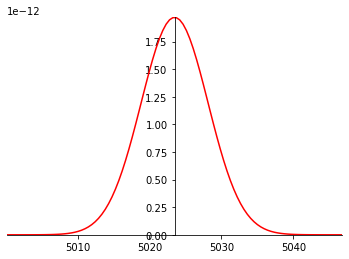

In [11]:
plotGaussian(Gaussians[601][0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in true_divide


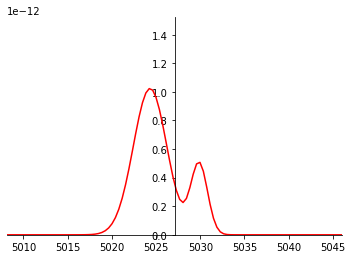

In [12]:
plot_8_Gaussians_Sum(Gaussians[605])

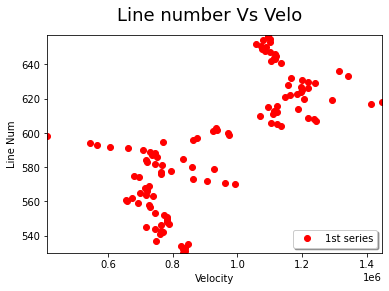

In [13]:
PlotVeloVsLineNum_Line_Dict(Lines)